In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import scipy.stats as st

In [2]:
# Read the csv file and save it in a dataframe
data_df = pd.read_csv("Datasets/Financial_stock_data.csv")
data_df['Industry'].unique()

array(['Mortgage', 'Insurance', 'Asset Management', 'Credit Services'],
      dtype=object)

In [3]:
# Convert date column to datetime format
data_df['Date'] = pd.to_datetime(data_df['Date'])

In [4]:
# Split the dataframe industry wise
df1 = data_df.loc[data_df['Industry']=="Mortgage",:]
df2 = data_df.loc[data_df['Industry']=="Insurance",:]
df3 = data_df.loc[data_df['Industry']=="Asset Management",:]
df4 = data_df.loc[data_df['Industry']=="Credit Services",:]

In [5]:
# Group each dataframe by Date on Average Close price
group_df1 = df1.groupby("Date")['Close'].mean().reset_index()
group_df2 = df2.groupby("Date")['Close'].mean().reset_index()
group_df3 = df3.groupby("Date")['Close'].mean().reset_index()
group_df4 = df4.groupby("Date")['Close'].mean().reset_index()

In [6]:
# Merge all the dataframes into a single one
merged_df = pd.merge(group_df1, group_df2, on='Date', how='inner', suffixes=('_df1', '_df2'))
merged_df = pd.merge(merged_df, group_df3, on='Date', how='inner', suffixes=('_merged', '_df3'))
merged_df = pd.merge(merged_df, group_df4, on='Date', how='inner', suffixes=('_df3', '_df4'))

In [7]:
# Rename columns to industry names
merged_df = merged_df.rename(columns={"Close_df1": "Mortgage",
                                      "Close_df2": "Insurance",
                                      "Close_df3": "Asset Management",
                                      "Close_df4": "Credit Services"})

In [8]:
merged_df = merged_df.dropna()
merged_df

,Date,Mortgage,Insurance,Asset Management,Credit Services
0,2018-01-02,24.692500,74.396999,192.632000,108.376003
1,2018-01-03,24.447500,74.349001,193.580004,109.188004
2,2018-01-04,24.515000,74.520001,195.939998,110.481999
3,2018-01-05,25.287500,75.021001,197.000003,111.714000
4,2018-01-08,25.065000,74.892000,197.597997,111.426001
...,...,...,...,...,...
1485,2023-11-27,47.706001,111.820001,253.443996,203.753999
1486,2023-11-28,47.678000,110.989998,254.730000,204.682004
1487,2023-11-29,48.413999,110.740001,257.972001,206.099998
1488,2023-11-30,48.200000,112.109999,259.407996,209.187997


In [9]:
# Find the correlation in Finance sector
close_columns = ['Mortgage', 'Insurance', 'Asset Management', 'Credit Services']
correlation_matrix = merged_df[close_columns].corr()
print(correlation_matrix)

                  Mortgage  Insurance  Asset Management  Credit Services
Mortgage          1.000000   0.730155          0.903624         0.908202
Insurance         0.730155   1.000000          0.703570         0.828117
Asset Management  0.903624   0.703570          1.000000         0.863482
Credit Services   0.908202   0.828117          0.863482         1.000000


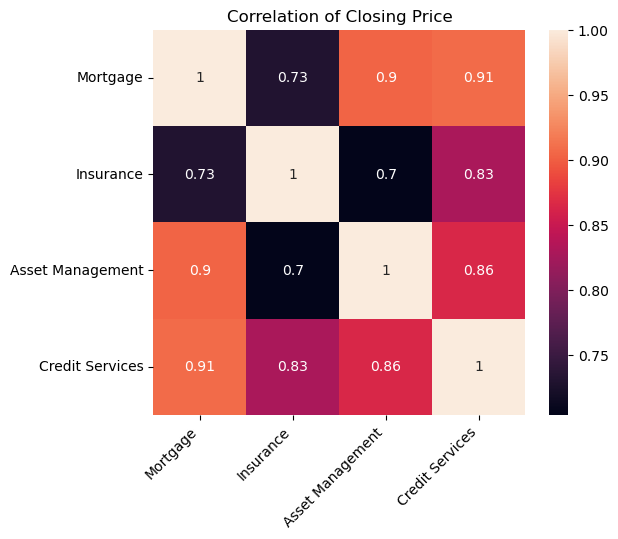

In [10]:
# Plot a heatmap to show the correlation
plt.figure(figsize=(6,5))
sbn.heatmap(correlation_matrix, annot = True)
plt.xticks(rotation = 45, ha='right')
plt.title('Correlation of Closing Price')
plt.savefig("finance_correlation.png")

The r-value is: 0.90


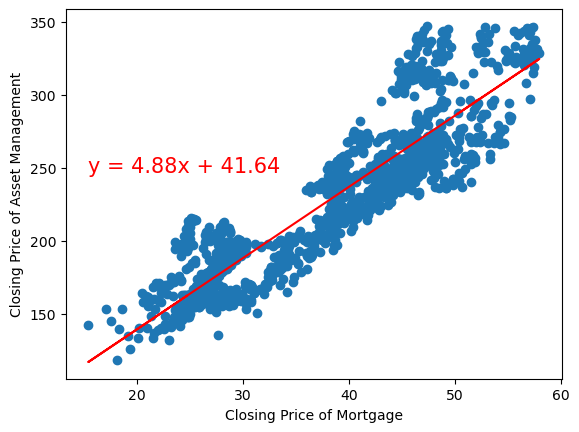

In [11]:
# Get the linear regression
slope1, intercept1, rvalue1, pvalue1, stderr1 = st.linregress(merged_df['Mortgage'], merged_df['Asset Management'])

# Form the line equation
line_eq1 = f"y = {slope1:.2f}x + {intercept1:.2f}"

# Get the regressed values from the line equation
regressed_values1 = (slope1 * merged_df['Mortgage']) + intercept1

# Plot the scatter diagram and linear regression
x_axis = merged_df['Mortgage']
y_axis = merged_df['Asset Management']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values1, color='r')
plt.annotate(line_eq1, (min(x_axis), max(y_axis)-100), fontsize=15, color='red')
plt.xlabel("Closing Price of Mortgage")
plt.ylabel("Closing Price of Asset Management")
correlation_coefficient1 = f'The r-value is: {rvalue1:.2f}'
print(correlation_coefficient1)

The r-value is: 0.91


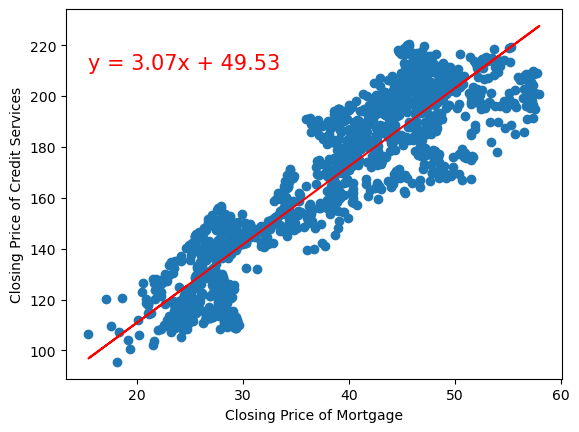

In [12]:
# Get the linear regression
slope2, intercept2, rvalue2, pvalue2, stderr2 = st.linregress(merged_df['Mortgage'], merged_df['Credit Services'])

# Form the line equation
line_eq2 = f"y = {slope2:.2f}x + {intercept2:.2f}"

# Get the regressed values from the line equation
regressed_values2 = (slope2 * merged_df['Mortgage']) + intercept2

# Plot the scatter diagram and linear regression
x_axis = merged_df['Mortgage']
y_axis = merged_df['Credit Services']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values2, color='r')
plt.annotate(line_eq2, (min(x_axis), max(y_axis)-10), fontsize=15, color='red')
plt.xlabel("Closing Price of Mortgage")
plt.ylabel("Closing Price of Credit Services")
correlation_coefficient2 = f'The r-value is: {rvalue2:.2f}'
print(correlation_coefficient2)

The r-value is: 0.83


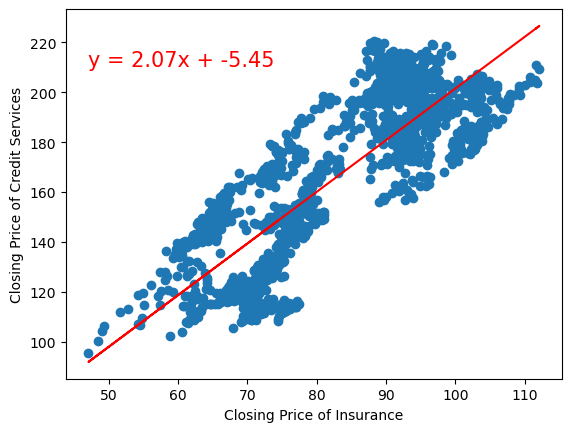

In [13]:
# Get the linear regression
slope3, intercept3, rvalue3, pvalue3, stderr3 = st.linregress(merged_df['Insurance'], merged_df['Credit Services'])

# Form the line equation
line_eq3 = f"y = {slope3:.2f}x + {intercept3:.2f}"

# Get the regressed values from the line equation
regressed_values3 = (slope3 * merged_df['Insurance']) + intercept3

# Plot the scatter diagram and linear regression
x_axis = merged_df['Insurance']
y_axis = merged_df['Credit Services']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values3, color='r')
plt.annotate(line_eq3, (min(x_axis), max(y_axis)-10), fontsize=15, color='red')
plt.xlabel("Closing Price of Insurance")
plt.ylabel("Closing Price of Credit Services")
correlation_coefficient3 = f'The r-value is: {rvalue3:.2f}'
print(correlation_coefficient3)

The r-value is: 0.86


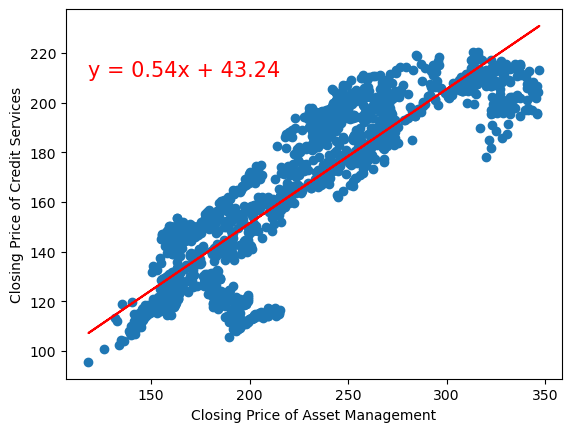

In [14]:
# Get the linear regression
slope4, intercept4, rvalue4, pvalue4, stderr4 = st.linregress(merged_df['Asset Management'], merged_df['Credit Services'])

# Form the line equation
line_eq4 = f"y = {slope4:.2f}x + {intercept4:.2f}"

# Get the regressed values from the line equation
regressed_values4 = (slope4 * merged_df['Asset Management']) + intercept4

# Plot the scatter diagram and linear regression
x_axis = merged_df['Asset Management']
y_axis = merged_df['Credit Services']
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regressed_values4, color='r')
plt.annotate(line_eq4, (min(x_axis), max(y_axis)-10), fontsize=15, color='red')
plt.xlabel("Closing Price of Asset Management")
plt.ylabel("Closing Price of Credit Services")
correlation_coefficient4 = f'The r-value is: {rvalue4:.2f}'
print(correlation_coefficient4)